<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Read-the-clean-data" data-toc-modified-id="Read-the-clean-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read the clean data</a></span></li><li><span><a href="#Method-01:-Aggregate-Model" data-toc-modified-id="Method-01:-Aggregate-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method 01: Aggregate Model</a></span><ul class="toc-item"><li><span><a href="#aggregate-the-data-per-customer" data-toc-modified-id="aggregate-the-data-per-customer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>aggregate the data per customer</a></span></li><li><span><a href="#calculate-CLV-variables" data-toc-modified-id="calculate-CLV-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>calculate CLV variables</a></span></li></ul></li><li><span><a href="#Method-02:-Cohort-Model" data-toc-modified-id="Method-02:-Cohort-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Method 02: Cohort Model</a></span></li><li><span><a href="#Method-03:-BG/NBD-Model-+-Gamma-Gamma-Model" data-toc-modified-id="Method-03:-BG/NBD-Model-+-Gamma-Gamma-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Method 03: BG/NBD Model + Gamma-Gamma Model</a></span><ul class="toc-item"><li><span><a href="#Get-RFM-summary-data" data-toc-modified-id="Get-RFM-summary-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Get RFM summary data</a></span></li><li><span><a href="#BG/NBD-Fitting-to-get-expected-number-of-purchases" data-toc-modified-id="BG/NBD-Fitting-to-get-expected-number-of-purchases-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>BG/NBD Fitting to get expected number of purchases</a></span><ul class="toc-item"><li><span><a href="#Customer-alive-probability" data-toc-modified-id="Customer-alive-probability-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Customer alive probability</a></span></li><li><span><a href="#Calculate-expected-number-of-purchase-upto-time" data-toc-modified-id="Calculate-expected-number-of-purchase-upto-time-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Calculate expected number of purchase upto time</a></span></li></ul></li><li><span><a href="#Gamma-Gamma-Modelling-for-Monetary-Value" data-toc-modified-id="Gamma-Gamma-Modelling-for-Monetary-Value-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Gamma-Gamma Modelling for Monetary Value</a></span></li><li><span><a href="#Fitting-GammaGamma-Model" data-toc-modified-id="Fitting-GammaGamma-Model-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Fitting GammaGamma Model</a></span></li><li><span><a href="#Predict-cutomer-life-time-value-using-ggf" data-toc-modified-id="Predict-cutomer-life-time-value-using-ggf-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Predict cutomer life time value using ggf</a></span></li></ul></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

# Description

- Data source: [Online Retail Datset from UCI](https://archive.ics.uci.edu/ml/datasets/online+retail)

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

<table style="width:100%">
    
<tr>
<th>Feature</th>
<th>Description</th> 
</tr>
<tr>
  <td>InvoiceNo</td>
  <td> Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. </td>
</tr>
<tr>
  <td>StockCode</td>
  <td> Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. </td>
</tr>
<tr>
  <td>Description</td>
  <td> Product (item) name. Nominal. </td>
</tr>
<tr>
  <td>Quantity</td>
  <td> The quantities of each product (item) per transaction. Numeric. </td>
</tr>
<tr>
  <td>InvoiceDate</td>
  <td> Invice Date and time. Numeric, the day and time when each transaction was generated. </td>
</tr>
<tr>
  <td>UnitPrice</td>
  <td> Unit price. Numeric, Product price per unit in sterling. </td>
</tr>
<tr>
  <td>CustomerID</td>
  <td> Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. </td>
</tr>
<tr>
  <td>Country</td>
  <td> Country name. Nominal, the name of the country where each customer resides.</td>
</tr></table>

![](data/raw/head.png)
![](data/raw/mid.png)
![](data/raw/tail.png)

# Load the libraries

In [1]:
import numpy as np
import pandas as pd
import os,sys,time
import re

time_start_notebook = time.time()

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# settings
SEED = 100
pd.set_option('max_columns',100)
pd.set_option('max_colwidth',200)

# special
import lifetimes

%matplotlib inline
%load_ext watermark
%watermark -iv

autopep8  : 1.5.7
re        : 2.2.1
json      : 2.0.9
matplotlib: 3.3.4
lifetimes : 0.11.3
seaborn   : 0.11.1
pandas    : 1.2.5
numpy     : 1.21.1
sys       : 3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]



In [2]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bp/")
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bp/bhishan")
from bhishan import bp

# Read the clean data

In [3]:
ifile = "data/processed/online_retail.parquet.gzip"

df = pd.read_parquet(ifile)

print(df.shape)
df.head(2).append(df.tail(2))

(354321, 6)


,customer_id,invoice_no,invoice_date,quantity,unit_price,total_sales
0,17850.0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34
541892,13113.0,581586,2011-12-09 12:49:00,24,8.95,214.80
541893,13113.0,581586,2011-12-09 12:49:00,10,7.08,70.80


# Method 01: Aggregate Model

The General Formula for calculating CLV is:

```

CLV = ((Average Sales X Purchase Frequency) / Churn) X Profit Margin

Where,
Average Sales = TotalSales/Total no. of orders
Purchase Frequency = Total no. of orders/Total unique customers
Retention rate = Total no. of orders greater than 1/ Total unique customers
Churn = 1 - Retention rate
Profit Margin = Based on business context (take 5% if not given)
```

## aggregate the data per customer

In [4]:
df_cust = df.groupby('customer_id').agg(
    age = ('invoice_date', lambda x: (x.max()-x.min()).days),
    frequency = ('invoice_no',len),
    total_sales = ('total_sales','sum')
    )

df_cust.head()

,age,frequency,total_sales
customer_id,,,
12346.0,0,1,77183.60
12747.0,366,103,4196.01
12748.0,372,4595,33719.73
12749.0,209,199,4090.88
12820.0,323,59,942.34


## calculate CLV variables

In [5]:
avg_sales = df_cust['total_sales'].mean()
purchase_freq = df_cust['frequency'].mean()
retention_rate = df_cust.query("frequency>1").shape[0] / df_cust.shape[0]

churn = 1 -retention_rate
profit_margin = 0.05 # choose yourself

In [6]:
CLV = avg_sales * purchase_freq / churn * profit_margin

print(f"Cutomer Lifetime Value CLV = ${CLV:,.0f}")

Cutomer Lifetime Value CLV = $471,851


In [7]:
"""
Observation:

This is aggregate model, it gives unrealistic CLV.

""";

In [8]:
df_cust['total_sales'].describe()

count      3920.000000
mean       1864.385601
std        7482.817477
min           3.750000
25%         300.280000
50%         652.280000
75%        1576.585000
max      259657.300000
Name: total_sales, dtype: float64

In [9]:
"""
Observation:

1. The CLV using Aggregate method gives value 797k,

But, 75% of customers have total sales less than 1.5k.

We need to use other methods than Aggregate model to estimate the 
customer lifetime value.

In the next section, we will use cohort method.

""";

# Method 02: Cohort Model

- There are different methods to create cohorts from the full data.
- Here, we are using monthly data and create 12 cohorts and calculate CLV for each cohorts.

In [10]:
df.head(2)

,customer_id,invoice_no,invoice_date,quantity,unit_price,total_sales
0,17850.0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34


In [11]:
df_cust = df.groupby('customer_id').agg(
    start_month = ('invoice_date', lambda x: x.min().month),
    frequency = ('invoice_no',len),
    total_sales = ('total_sales','sum')
)

df_cust.head()

,start_month,frequency,total_sales
customer_id,,,
12346.0,1,1,77183.60
12747.0,12,103,4196.01
12748.0,12,4595,33719.73
12749.0,5,199,4090.88
12820.0,1,59,942.34


In [12]:
months = ['Jan', 'Feb', 'March', 'Apr', 'May',
          'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

clv_monthly = []

for i in range(1,13):
    dfc = df_cust.query("start_month==@i")
    
    avg_sales = dfc['total_sales'].mean()
    pur_freq = dfc['frequency'].mean()
    ret_rate = dfc.query("frequency>1").shape[0]/dfc.shape[0]
    churn = 1-ret_rate
    
    CLV = avg_sales *pur_freq / churn *profit_margin
    clv_monthly.append(CLV)

In [13]:
df_clv_monthly = pd.DataFrame({'Month': months,
                              'CLV': clv_monthly})

df_clv_monthly.style.background_gradient()

,Month,CLV
0,Jan,807795.771327
1,Feb,272699.905100
2,March,432619.978714
3,Apr,239316.006912
4,May,133384.514952
5,Jun,286107.889868
6,Jul,53007.355670
7,Aug,134038.232234
8,Sep,165834.460286
9,Oct,86161.618740


<AxesSubplot:xlabel='Month'>

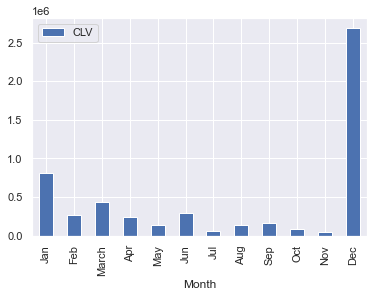

In [14]:
df_clv_monthly.plot.bar(x='Month',y='CLV')

In [15]:
"""
Observation:

1. We can see CLV is very in December,
   this might be becasue of Christmas.

""";

# Method 03: BG/NBD Model + Gamma-Gamma Model

- Install module lifetimes `conda install -y -n fin -c conda-forge lifetimes`

- BG/NBD stands for Beta Geometric/Negative Binomial Distribution

The BG/NBD modelling is one of the most used models as like Pareto/NBD model.

These methods try to predict the future transactions of each customers.

To calculate the monetary value we use gamma-gamma model.


Assumptions of he BG/NBD model:
1. When a user is active, number of transactions in a time t is described by Poisson distribution with rate lambda.
1. Heterogeneity in transaction across users (difference in purchasing behavior across users) has Gamma distribution with shape parameter r and scale parameter a.
1. Users may become inactive after any transaction with probability p and their dropout point is distributed between purchases with Geometric distribution.
1. Heterogeneity in dropout probability has Beta distribution with the two shape parameters alpha and beta.
1. Transaction rate and dropout probability vary independently across users.


RFM Analysis:

- RFM means Recency, Frequency, Monetary Value.

```
frequency - the number of repeat purchases (more than 1 purchases)
recency - the time between the first and the last transaction
T - the time between the first purchase and the end of the transaction period
monetary_value - it is the mean of a given customers sales value
```

In [16]:
import lifetimes

In [17]:
bp.show_methods(lifetimes)

,0,1,2
0,BaseFitter,ModifiedBetaGeoFitter,generate_data
1,BetaGeoBetaBinomFitter,ParetoNBDFitter,utils
2,BetaGeoFitter,fitters,version
3,GammaGammaFitter,,


In [18]:
bp.show_methods(lifetimes.utils)

,0,1,2
0,ConvergenceError,dill,expected_cumulative_transactions
1,calculate_alive_path,division,summary_data_from_transaction_data
2,calibration_and_holdout_data,,


## Get RFM summary data

In [19]:
print(df.shape)
df.head(2)

(354321, 6)


,customer_id,invoice_no,invoice_date,quantity,unit_price,total_sales
0,17850.0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34


In [20]:
# make sure thare are no nans in customer id
df['customer_id'].isna().sum()

0

In [21]:
df.customer_id.dtype

dtype('O')

In [22]:
df.query("customer_id == 'nan'").shape

(0, 6)

In [23]:
df_rfm = lifetimes.utils.summary_data_from_transaction_data(
    df,'customer_id','invoice_date','total_sales')

df_rfm = df_rfm.reset_index()

print(df_rfm.shape)
df_rfm.head(2)

(3920, 5)


,customer_id,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000
1,12747.0,10.0,367.0,369.0,383.745


In [24]:
"""
Observation:

Here the value of 0 in frequency and recency means that,
these are one time buyers.

""";

<AxesSubplot:>

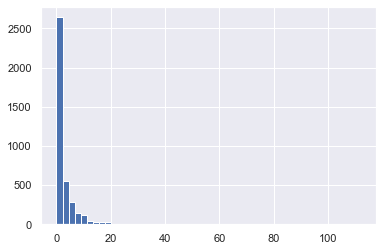

In [25]:
df_rfm['frequency'].hist(bins=50)

In [26]:
df_rfm.describe()

,frequency,recency,T,monetary_value
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,2.850000,131.343622,223.085714,293.099532
std,5.713358,132.443948,118.037855,2734.951972
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,112.000000,0.000000
50%,1.000000,94.000000,249.000000,173.625000
75%,3.000000,252.000000,327.000000,347.946042
max,112.000000,373.000000,373.000000,168469.600000


## BG/NBD Fitting to get expected number of purchases

In [27]:
# lifetimes.BetaGeoFitter?

In [28]:
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)

bgf.fit(df_rfm['frequency'],df_rfm['recency'],df_rfm['T']);

bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.833433,0.028549,0.777477,0.889389
alpha,69.637792,2.788365,64.172597,75.102988
a,0.005493,0.013933,-0.021816,0.032802
b,7.955385,23.159843,-37.437907,53.348677


### Customer alive probability

In [29]:
bp.show_methods(bgf,2)

,0,1
0,conditional_expected_number_of_purchases_up_to_time,params_
1,conditional_probability_alive,penalizer_coef
2,conditional_probability_alive_matrix,predict
3,confidence_intervals_,probability_of_n_purchases_up_to_time
4,data,save_model
5,expected_number_of_purchases_up_to_time,standard_errors_
6,fit,summary
7,generate_new_data,variance_matrix_
8,load_model,


In [30]:
import lifetimes.plotting
bp.show_methods(lifetimes.plotting,2)

,0,1
0,calculate_alive_path,plot_frequency_recency_matrix
1,coalesce,plot_history_alive
2,expected_cumulative_transactions,plot_incremental_transactions
3,forceAspect,plot_period_transactions
4,plot_calibration_purchases_vs_holdout_purchases,plot_probability_alive_matrix
5,plot_cumulative_transactions,plot_transaction_rate_heterogeneity
6,plot_dropout_rate_heterogeneity,stats
7,plot_expected_repeat_purchases,


In [31]:
df_rfm['prob_alive'] = bgf.conditional_probability_alive(
    df_rfm['frequency'],
    df_rfm['recency'],
    df_rfm['T']
)
df_rfm.head()

,customer_id,frequency,recency,T,monetary_value,prob_alive
0,12346.0,0.0,0.0,325.0,0.000000,1.000000
1,12747.0,10.0,367.0,369.0,383.745000,0.999660
2,12748.0,112.0,373.0,373.0,301.024821,0.999954
3,12749.0,3.0,210.0,213.0,1077.260000,0.999426
4,12820.0,3.0,323.0,326.0,257.293333,0.999432


In [32]:
"""
Note:

The probabilty of being alive is calculated based on
  the recency and frequency of a customer.
  
So, If a customer has bought multiple times (frequency)
    and the time between first & last transaction is high (recency),
    then their probability of being alive is high.

""";

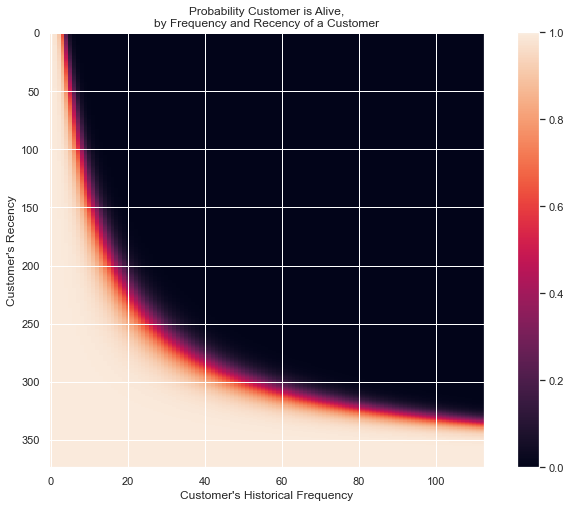

In [33]:
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf);

### Calculate expected number of purchase upto time

In [34]:
t = 30 # next n days
df_rfm['exp_num_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,
    df_rfm['frequency'],
    df_rfm['recency'],
    df_rfm['T'])

df1 = df_rfm.sort_values(by='exp_num_purchases', ascending=False).head()
df1

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases
2,12748.0,112.0,373.0,373.0,301.024821,0.999954,7.645667
3593,17841.0,111.0,372.0,373.0,364.452162,0.999940,7.577803
1771,15311.0,89.0,373.0,373.0,677.729438,0.999943,6.087118
1267,14606.0,88.0,372.0,373.0,135.890114,0.999929,6.019278
110,12971.0,70.0,369.0,372.0,159.211286,0.999884,4.810275


In [35]:
# look at topmost customer
ser = df1.iloc[0]
ser

customer_id             12748.0
frequency                 112.0
recency                   373.0
T                         373.0
monetary_value       301.024821
prob_alive             0.999954
exp_num_purchases      7.645667
Name: 2, dtype: object

In [36]:
print(f"""In {ser['recency']:.0f} days,
he purchased {ser['frequency']:.0f} times.

Average per day is: {ser['frequency']:.0f}/{ser['recency']:.0f} =  {ser['frequency']/ser['recency']:.4f} times.

In {t} days : {t} * {ser['frequency']/ser['recency']:.4f} = {t * ser['frequency']/ser['recency']:.4f}

Our prediction is: {ser['exp_num_purchases']:.4f}

Difference = {t * ser['frequency']/ser['recency']:.4f} - {ser['exp_num_purchases']:.4f} = {(t * ser['frequency']/ser['recency']) - (ser['exp_num_purchases']):.4f}
""")

In 373 days,
he purchased 112 times.

Average per day is: 112/373 =  0.3003 times.

In 30 days : 30 * 0.3003 = 9.0080

Our prediction is: 7.6457

Difference = 9.0080 - 7.6457 = 1.3624



## Gamma-Gamma Modelling for Monetary Value

assumptions of Gamma-Gamma model are:

1. The monetary value of a customer's given transaction varies randomly around their average transaction value.
1. Average transaction value varies across customers but do not vary over time for any given customer.
1. The distribution of average transaction values across customers is independent of the transaction process.

**NOTE**: We are considering only customers who made repeat purchases with the business i.e., frequency > 0. Because, if frequency is 0, it means that they are one time customer and are considered already dead.

In [37]:
df_rfm.head(2)

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases
0,12346.0,0.0,0.0,325.0,0.000,1.00000,0.063354
1,12747.0,10.0,367.0,369.0,383.745,0.99966,0.740595


In [38]:
df_rfm.query("frequency==0").shape

(1398, 7)

In [39]:
df_rfm2 = df_rfm.query("frequency >0")

In [40]:
df_rfm2[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.00000,0.00954
monetary_value,0.00954,1.00000


In [41]:
"""
Observation:

The correlation seems very weak. Hence, we can conclude that, 
the assumption is satisfied and we can fit the model to our data.

""";

## Fitting GammaGamma Model

In [42]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)

ggf.fit(df_rfm2['frequency'],
       df_rfm2['monetary_value'])

ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.133452,0.282670,10.579419,11.687486
q,0.860041,0.021344,0.818207,0.901875
v,11.330566,0.296364,10.749692,11.911440


In [43]:
df_rfm2.query("monetary_value == 0").shape

(0, 7)

In [44]:
df_rfm2 = df_rfm2.query("monetary_value != 0")

In [45]:
bp.show_methods(ggf)

,0,1,2
0,conditional_expected_average_profit,fit,save_model
1,confidence_intervals_,load_model,standard_errors_
2,customer_lifetime_value,params_,summary
3,data,penalizer_coef,variance_matrix_


In [46]:
# Here, we get exp avg sales NOT exp avg profit (we will mulitply by profit_margin later.)
df_rfm2['exp_avg_sales'] = ggf.conditional_expected_average_profit(
    df_rfm2['frequency'],
    df_rfm2['monetary_value'])

df_rfm2.head()

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases,exp_avg_sales
1,12747.0,10.0,367.0,369.0,383.745000,0.999660,0.740595,385.362498
2,12748.0,112.0,373.0,373.0,301.024821,0.999954,7.645667,301.159790
3,12749.0,3.0,210.0,213.0,1077.260000,0.999426,0.406607,1085.585845
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.290486,262.168769
6,12822.0,1.0,17.0,87.0,257.980000,0.997959,0.350374,272.739188


In [47]:
print(f"Expected Average Sales: {df_rfm2['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {df_rfm2['monetary_value'].mean()}")

Expected Average Sales: 464.5104833021637
Actual Average Sales: 455.5710405734213


## Predict cutomer life time value using ggf

In [48]:
# Predicting Customer Lifetime Value for the next 30 days
df_rfm2['predicted_clv'] = ggf.customer_lifetime_value(bgf,
    df_rfm2['frequency'],
    df_rfm2['recency'],
    df_rfm2['T'],
    df_rfm2['monetary_value'],
    time=1,     # lifetime in months
    freq='D',   # frequency in which the data is present(T)      
    discount_rate=0.01 # discount rate per month is 0.01 (per year is about 12.7)
    )
df_rfm2.head()

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases,exp_avg_sales,predicted_clv
1,12747.0,10.0,367.0,369.0,383.745000,0.999660,0.740595,385.362498,282.571679
2,12748.0,112.0,373.0,373.0,301.024821,0.999954,7.645667,301.159790,2279.769847
3,12749.0,3.0,210.0,213.0,1077.260000,0.999426,0.406607,1085.585845,437.036033
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.290486,262.168769,75.402351
6,12822.0,1.0,17.0,87.0,257.980000,0.997959,0.350374,272.739188,94.614601


In [49]:
df_rfm2['manual_predicted_clv'] = df_rfm2['exp_num_purchases'] * df_rfm2['exp_avg_sales']
df_rfm2.head()

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases,exp_avg_sales,predicted_clv,manual_predicted_clv
1,12747.0,10.0,367.0,369.0,383.745000,0.999660,0.740595,385.362498,282.571679,285.397396
2,12748.0,112.0,373.0,373.0,301.024821,0.999954,7.645667,301.159790,2279.769847,2302.567546
3,12749.0,3.0,210.0,213.0,1077.260000,0.999426,0.406607,1085.585845,437.036033,441.406393
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.290486,262.168769,75.402351,76.156375
6,12822.0,1.0,17.0,87.0,257.980000,0.997959,0.350374,272.739188,94.614601,95.560747


In [50]:
# how different are the sales predictions?
(df_rfm2['predicted_clv']-
    df_rfm2['manual_predicted_clv']).describe()

count    2522.000000
mean       -2.255118
std         9.024262
min      -338.071944
25%        -2.114399
50%        -1.102105
75%        -0.544666
max        -0.027260
dtype: float64

<AxesSubplot:>

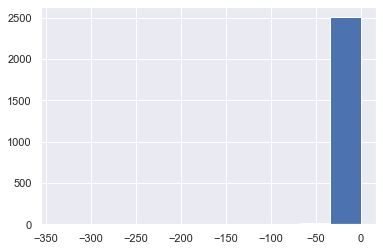

In [51]:
# how different are the sales predictions?
(df_rfm2['predicted_clv']-
    df_rfm2['manual_predicted_clv']).hist()

In [52]:
"""
Note:

Here, clv is for the sales NOT for the profit.
To get clv for profit we need to mulitply by profit_margin.
""";

In [53]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
df_rfm2['CLV'] = df_rfm2['predicted_clv'] * profit_margin
df_rfm2.head()

,customer_id,frequency,recency,T,monetary_value,prob_alive,exp_num_purchases,exp_avg_sales,predicted_clv,manual_predicted_clv,CLV
1,12747.0,10.0,367.0,369.0,383.745000,0.999660,0.740595,385.362498,282.571679,285.397396,14.128584
2,12748.0,112.0,373.0,373.0,301.024821,0.999954,7.645667,301.159790,2279.769847,2302.567546,113.988492
3,12749.0,3.0,210.0,213.0,1077.260000,0.999426,0.406607,1085.585845,437.036033,441.406393,21.851802
4,12820.0,3.0,323.0,326.0,257.293333,0.999432,0.290486,262.168769,75.402351,76.156375,3.770118
6,12822.0,1.0,17.0,87.0,257.980000,0.997959,0.350374,272.739188,94.614601,95.560747,4.730730


# Time Taken

In [54]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 6 secs
